In [0]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plab
import pickle
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier

np.warnings.filterwarnings('ignore') # Due to the presence of NaN values

In [0]:
from google.colab import files

files.upload() #upload 'gtd_reduxed_v2.csv' and 'region_dict.pickle'

In [0]:
df = pd.read_csv('gtd_reduxed_v2.csv', encoding = 'ISO-8859-1')
pickle_in = open("region_dict.pickle","rb")
loaded_region_dict = pickle.load(pickle_in)

In [0]:
columns = ['imonth', 'iday', 'extended', 'region',
       'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1',
       'natlty1', 'weaptype1', 'nkill',
       'nkillter', 'nwound', 'nwoundte']

columns2 =['targsubtype1', 'natlty1']
total_lines = 181691
total_cells = 15 * total_lines
counter = 1
nan_dict = {}

for i in df.index:
  for j in columns:
    if j not in nan_dict:
      nan_dict[j]=0
        
    val = df.loc[i,j]
    try:
      if np.isnan(val):
        nan_dict[j]+=1
    except:
      print('There was an exception running column ' + str(j))
    perc_calc = (counter/total_cells)*100
    if(perc_calc % 10 == 0):
      print('Done ' + str(perc_calc) + '%.')
    counter+=1
  

Done 20.0%.
Done 40.0%.
Done 60.0%.
Done 80.0%.
Done 100.0%.


In [0]:
total_nans = 0

for x,y in nan_dict.items():
  spar = (y/total_lines)*100
  total_nans += y
  print()
  print('Current Field: ' + x)
  print('Number of NaNs found: ' + str(y))
  print('Sparsity of collumm: ' + str(spar))

total_spar = (total_nans/total_cells)*100
print()
print('Total Sparity: ' + str(total_spar))



Current Field: imonth
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: iday
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: extended
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: region
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: success
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: suicide
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: attacktype1
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: targtype1
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: targsubtype1
Number of NaNs found: 10373
Sparsity of collumm: 5.709143545910364

Current Field: natlty1
Number of NaNs found: 1559
Sparsity of collumm: 0.8580502061191804

Current Field: weaptype1
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: nkill
Number of NaNs found: 10313
Sparsity of collumm: 5.676120446252153

Current Field: nkillter
Number of NaNs found: 66958
Sparsity o

#Catalogar Dataset

##Dimensionalidade
- 22 Colunas

##Esparsidade
- Dataset denso, aproximadamente 6.41% de esparsidade total, não foi considerado valores a 0 como possíveis influentes para uma coluna esparsa, visto que este valor é sempre considerável no contexto do modelo. 
Colunas com maior valor de esparsidade:
 - targsubtype1 - 5.71%;
 - nkill - 5.68%;
 - nkillter - 36.85%;
 - nwound - 8.98%;
 - nwoundte - 38.06%
 
##Resolução
- Não existem colunas com valores unitários (preço, temperatura, peso, etc..)

##Tamanho

- 181691 entries


In [0]:
arrCompleteNum = [2,3,4,5,7,8,9,11,13,15,17,19,20,21,22]
arrCompleteText = [6,10,12,18] # nao foi utilizado a coluna 'targsubtype1_txt devido a existencia de valores impossiveis de trabalhar com '

Average value of imonth is: 6.0 and mode is : 5
Variance is :  11.5

 Histogram 



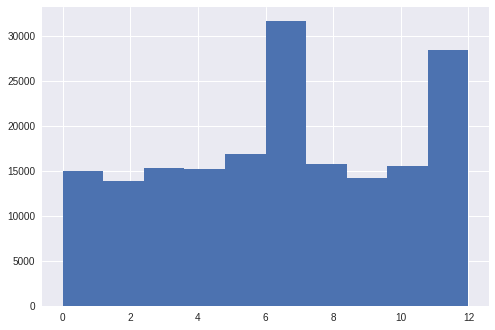




Average value of iday is: 16.0 and mode is : 15
Variance is :  77.7

 Histogram 



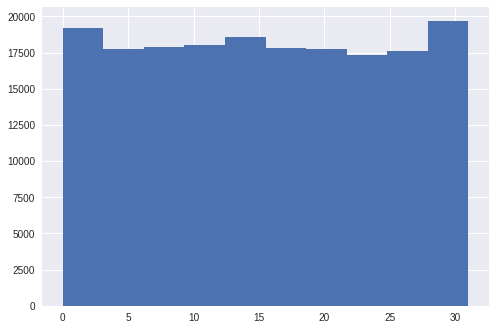




Average value of extended is: 0.0 and mode is : 0
Variance is :  0.0

 Histogram 



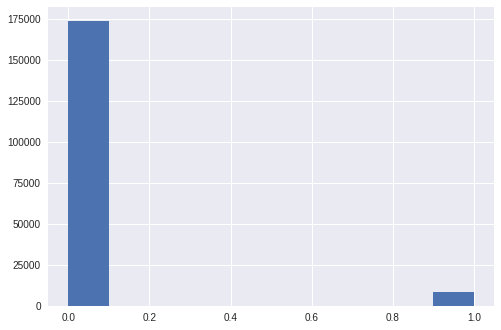




Average value of region is: 7.0 and mode is : 10
Variance is :  8.6

 Histogram 



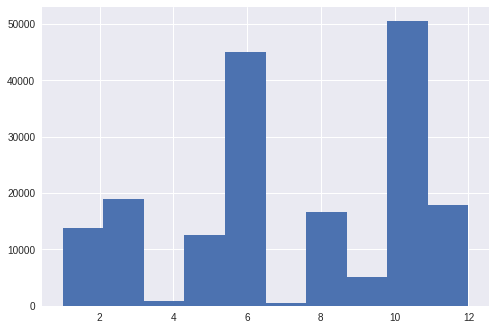




Average value of success is: 1.0 and mode is : 1
Variance is :  0.1

 Histogram 



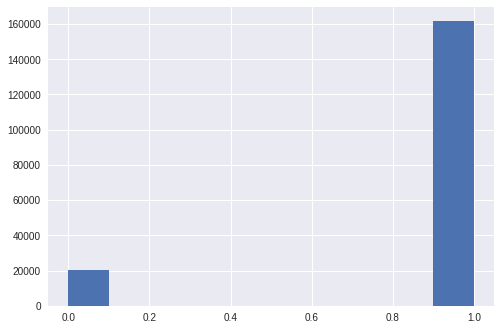




Average value of suicide is: 0.0 and mode is : 0
Variance is :  0.0

 Histogram 



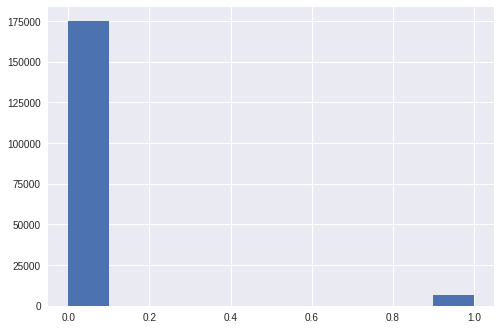




Average value of attacktype1 is: 3.0 and mode is : 3
Variance is :  3.7

 Histogram 



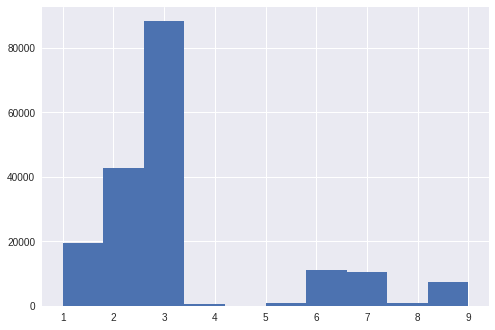




Average value of targtype1 is: 8.0 and mode is : 14
Variance is :  44.3

 Histogram 



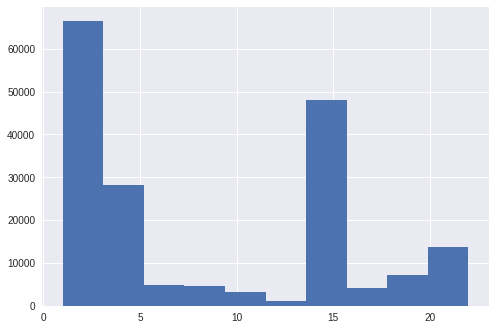




Average value of targsubtype1 is: 47.0 and mode is : 67.0
Variance is :  958.1

 Histogram 



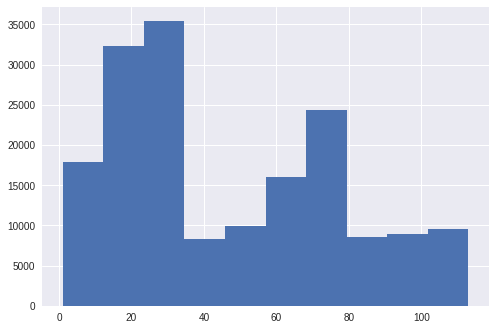




Average value of natlty1 is: 128.0 and mode is : 95.0
Variance is :  7974.3

 Histogram 



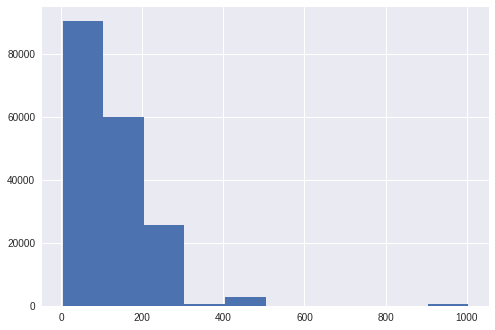




Average value of weaptype1 is: 6.0 and mode is : 6
Variance is :  4.7

 Histogram 



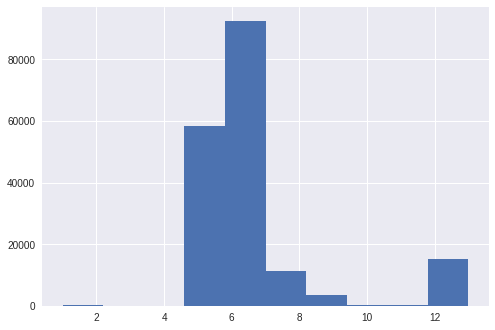




Average value of nkill is: 2.0 and mode is : 0.0
Variance is :  133.3

 Histogram 



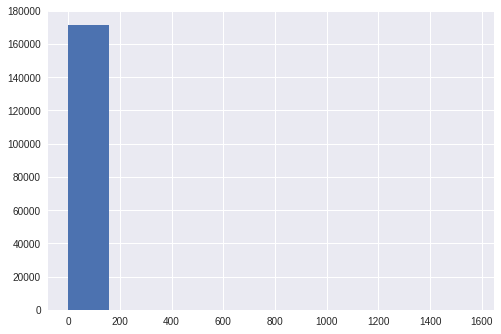




Average value of nkillter is: 1.0 and mode is : 0.0
Variance is :  17.6

 Histogram 



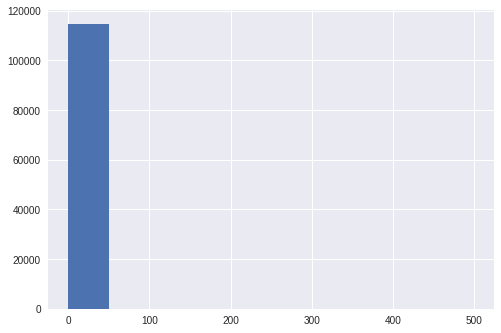




Average value of nwound is: 3.0 and mode is : 0.0
Variance is :  1292.4

 Histogram 



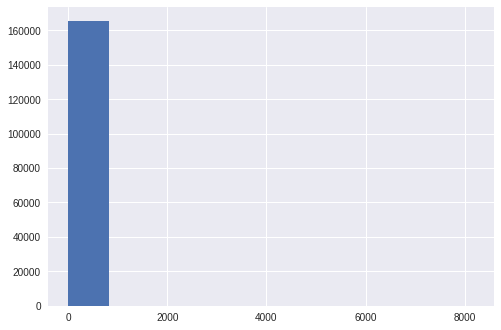




Average value of nwoundte is: 0.0 and mode is : 0.0
Variance is :  2.2

 Histogram 



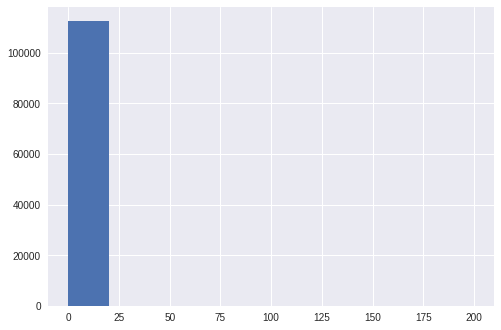

In [0]:
for i in arrCompleteNum:
  mean = np.mean(df.iloc[:,i])
  mode = df.iloc[:,i].mode()
  print('Average value of ' + df.columns.values[i] +' is: ' + str(np.around(mean)) + ' and mode is : ' + str(mode[0]))

  variance = np.var(df.iloc[:,i])
  print('Variance is :  ' + str(np.around(variance,1)))

  minVal = np.min(df.iloc[:,i])
  maxVal = np.max(df.iloc[:,i])

  print('\n Histogram \n')
  plt.hist(df.iloc[:,i], range=(minVal,maxVal))
  plt.show()
  print('\n\n')


In [0]:
for i in arrCompleteText:
  mode = df.iloc[:,i].mode()
  print('Mode of ' + df.columns.values[i] + ' is : ' + mode[0])

  minVal = np.min(df.iloc[:,i].apply(str))
  maxVal = np.max(df.iloc[:,i].apply(str))

  print('\n Histogram \n')
  fig, ax = plt.subplots(1, 1)
  
  counts, bins, bars = ax.hist(df.iloc[:,i].apply(str), range=(minVal,maxVal))
  for tick in ax.get_xticklabels():
    tick.set_rotation(90)
  
  plt.show()
  print('\n\n')
  

#Catalogar Features

##Tipo
- Discreto:
  - iyear; imonth; iday; country; region; attacktype1; targtype1; targsubtype1; natlty1; weaptype1; nkill; nkillter; nwound; nwoundte 
- Binário:
  - extended; success; suicide;




In [0]:
### DATA PREPARATION ###

targets = df['region'].unique()
df_test = df.loc[0:,['region','imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']]

features = list(df_test.columns[1:])
df_test.replace([np.inf, -np.inf], np.nan)


# "mini-modelo" que subsitui valores infinitos e NaNs pelo valor mais comum de modo a permitir a aplicaçao do modelo de classificação 

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

y = df_test['region']
X = df_test[features]

imp_mean.fit(X,y)
X = imp_mean.transform(X)


# divisao train / test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# divisao train / validation
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.1, random_state=42)




In [23]:
### DECISION TREE ###

dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X_train, y_train)

score_train = dt.score(X_train, y_train)
score_test = dt.score(X_test, y_test)

print("Score train: " + str(score_train))
print("Score test: " + str(score_test))

Score train: 0.9666554549902152
Score test: 0.952172596934423


In [0]:
# test_predict holds the prediction test sequences to be applied to the various models taken from the existing dataset
test_predict=[[12,31,0,0,0,3,2,21.0,92.0,6,0.0,0.0,0.0,0.0], 
              [12,31,0,1,0,7,14,76.0,160.0,8,0.0,0.0,0.0,0.0],
              [12,31,0,1,0,2,4,36.0,182.0,5,1.0,0.0,2.0,0.0],
              [12,31,0,1,0,3,4,27.0,167.0,6,2.0,0.0,7.0,0.0],
              [12,28,0,1,0,7,15,86.0,92.0,8,1.0,0.0,0.0,0.0],
              [1,25,0,1,0,7,14,71.0,217.0,8,0.0,0.0,0.0,0.0],
              [12,30,0,1,0,2,14,67.0,233.0,5,0.0,0.0,2.0,0.0],
              [1,19,0,0,0,3,4,28.0,217.0,6,0.0,0.0,0.0,0.0],
              [3,28,0,1,0,3,10,55.0,11.0,6,0.0,0.0,0.0,0.0],
              [11,8,0,1,0,3,1,3.0,61.0,6,0.0,0.0,0.0,0.0]]

# real_value holds the true values of the target label 'region' corresponding to test_predict

real_value = [6,5,11,10,6,1,8,1,3,2] #2 has NaN in 'nkillter' and 'nwoundte', columns replaced in test_predict with most common = 0.0

In [0]:
### DECISION TREE PREDICTION TEST ###

#'imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte'

real_value_txt = []
counter = 0;

for i in real_value:
  for x,y in loaded_region_dict.items():
    if y == i:
      real_value_txt.append(x)

test_result = dt.predict(test_predict)

for i in test_result:
  for x,y in loaded_region_dict.items():
    if y == i:
      print("Real region is : " + real_value_txt[counter] +"\t\tPredicted region is: " + x)
      counter +=1
      


Real region is : South Asia		Predicted region is: South Asia
Real region is : Southeast Asia		Predicted region is: Southeast Asia
Real region is : Sub-Saharan Africa		Predicted region is: Sub-Saharan Africa
Real region is : Middle East & North Africa		Predicted region is: Eastern Europe
Real region is : South Asia		Predicted region is: South Asia
Real region is : North America		Predicted region is: North America
Real region is : Western Europe		Predicted region is: Western Europe
Real region is : North America		Predicted region is: North America
Real region is : South America		Predicted region is: South America
Real region is : Central America & Caribbean		Predicted region is: Central America & Caribbean


In [18]:
### RANDOM FORREST ###
rf = RandomForestClassifier(max_depth=14, random_state=0,n_estimators=100)
rf.fit(X_train,y_train)

score_train = rf.score(X_train, y_train)
score_test = rf.score(X_test, y_test)

print("Score train: " + str(score_train))
print("Score test: " + str(score_test))

Score train: 0.43021555548253543
Score test: 0.4331960172784736


In [0]:
depth_val = 14
score_result = []

for i in range (26):
  rf = RandomForestClassifier(max_depth=depth_val, random_state=0,n_estimators=100)
  scores = cross_val_score(rf,X_train,y_train,cv=5)
  print("Average value for "+ str(depth_val) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  depth_val +=4
  
score_result  

In [0]:
### RANDOM FORREST PREDICTION TEST ###
real_value_txt = []
counter = 0;

for i in real_value:
  for x,y in loaded_region_dict.items():
    if y == i:
      real_value_txt.append(x)

test_result = rf.predict(test_predict)

for i in test_result:
  for x,y in loaded_region_dict.items():
    if y == i:
      print("Real region is : " + real_value_txt[counter] +"\t\tPredicted region is: " + x)
      counter +=1

Real region is : South Asia		Predicted region is: South Asia
Real region is : Southeast Asia		Predicted region is: Southeast Asia
Real region is : Sub-Saharan Africa		Predicted region is: Sub-Saharan Africa
Real region is : Middle East & North Africa		Predicted region is: Middle East & North Africa
Real region is : South Asia		Predicted region is: South Asia
Real region is : North America		Predicted region is: North America
Real region is : Western Europe		Predicted region is: Western Europe
Real region is : North America		Predicted region is: Western Europe
Real region is : South America		Predicted region is: South America
Real region is : Central America & Caribbean		Predicted region is: Central America & Caribbean


In [0]:
### MLP - Multi-layer Perceptron ###

mlp = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(17, 12), random_state=1,max_iter = 250)
mlp.fit(X_train,y_train)

score_train = mlp.score(X_train, y_train)
score_test = mlp.score(X_test, y_test)

print("Score train: " + str(score_train))
print("Score test: " + str(score_test))

Score train: 0.660804061380738
Score test: 0.6620357244116813


In [0]:
### MLP PREDICTION TEST ###
real_value_txt = []
counter = 0;

for i in real_value:
  for x,y in loaded_region_dict.items():
    if y == i:
      real_value_txt.append(x)

test_result = mlp.predict(test_predict)

for i in test_result:
  for x,y in loaded_region_dict.items():
    if y == i:
      print("Real region is : " + real_value_txt[counter] +"\t\tPredicted region is: " + x)
      counter +=1


Real region is : South Asia		Predicted region is: Middle East & North Africa
Real region is : Southeast Asia		Predicted region is: South America
Real region is : Sub-Saharan Africa		Predicted region is: Sub-Saharan Africa
Real region is : Middle East & North Africa		Predicted region is: Sub-Saharan Africa
Real region is : South Asia		Predicted region is: South Asia
Real region is : North America		Predicted region is: Western Europe
Real region is : Western Europe		Predicted region is: Middle East & North Africa
Real region is : North America		Predicted region is: Western Europe
Real region is : South America		Predicted region is: South America
Real region is : Central America & Caribbean		Predicted region is: Western Europe


In [0]:
df.corr()

,Unnamed: 0,eventid,imonth,iday,extended,region,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,weaptype1,nkill,nkillter,nwound,nwoundte
Unnamed: 0,1.000000,0.955971,0.034361,0.025062,0.092043,0.386987,-0.109257,0.134261,0.090415,0.079403,0.043323,-0.008359,0.010851,0.015216,0.048305,0.008508,0.043430
eventid,0.955971,1.000000,0.002706,0.018336,0.091761,0.401371,-0.082972,0.137743,0.074173,0.079080,0.048798,-0.019084,-0.011716,0.015351,0.027579,0.015282,0.027904
imonth,0.034361,0.002706,1.000000,0.005497,-0.000468,-0.002999,-0.002845,0.003071,0.006705,-0.000948,0.001508,-0.004838,0.007863,0.003463,0.003462,0.002938,0.005091
iday,0.025062,0.018336,0.005497,1.000000,-0.004700,0.009710,-0.011802,0.003593,-0.005333,-0.000052,-0.003184,0.003845,-0.003019,-0.003693,-0.002012,-0.001268,0.001812
extended,0.092043,0.091761,-0.000468,-0.004700,1.000000,0.038389,0.073233,-0.033961,0.272272,0.011613,0.022996,0.013609,0.207802,0.027737,0.005409,-0.006627,0.001592
region,0.386987,0.401371,-0.002999,0.009710,0.038389,1.000000,-0.030909,0.112672,0.007642,0.041396,0.030704,0.149821,0.013257,0.042062,0.026296,0.020472,-0.025643
success,-0.109257,-0.082972,-0.002845,-0.011802,0.073233,-0.030909,1.000000,-0.031155,0.048408,-0.059637,0.038192,-0.007157,-0.008178,0.053115,-0.019463,0.025804,-0.012840
suicide,0.134261,0.137743,0.003071,0.003593,-0.033961,0.112672,-0.031155,1.000000,-0.029962,-0.023440,-0.029521,-0.009207,-0.039928,0.136086,0.099133,0.099525,0.001780
attacktype1,0.090415,0.074173,0.006705,-0.005333,0.272272,0.007642,0.048408,-0.029962,1.000000,0.014513,0.022159,0.013769,0.658954,0.002475,0.036918,0.000846,0.029672
targtype1,0.079403,0.079080,-0.000948,-0.000052,0.011613,0.041396,-0.059637,-0.023440,0.014513,1.000000,0.982772,-0.034994,0.019846,0.008499,-0.038008,0.011303,-0.032612


#Features:

###imonth/iday:

  Consideramos esta feature possivelmente importante visto existirem acontecimentos influenciados diretamente por fatores temporais (feriados religiosos, eleiçoes, entre outros) dependendo do país.
 
 
###extended:
 
  Acreditamos que a duração do acontecimento poderá ser importante. Acontecimentos que durem mais que um dia de uma forma constante poderá significar melhor organização por parte terrorista ou maior dificuldade de contenção por parte das autoridades.
  
###success:
  
  Da mesma maneira que 'extended', poderá tambem significar melhor capacidade de organização por parte terrorista, ou falta de preparação pelas autoridades.
  
### suicide:
 
  Certos tipos de métodos de ataque levam ao suicidio do(s) atacante(s). Esta feature irá server de suporte á feature do tipo de ataque para suportar esta teoria, criando uma ligação entre o tipo de arma e o local de acontecimento.
  
### attacktype1:
 
  O método de ataque. Utilizado para criar uma ligação entre este e a região de acontecimento. Paises desenvolvidos iremos encontrar armamento balistico, enquanto medio oriente poderemos contar mais com elementos explosivos.
  
### targtype1/targsubtype1:
 
  O alvo do ataque. Acreditamos que diferentes regiões têm como algo diferentes elementos (civis, segurança publica, governo).
  
### weaptype1:
  
  A arma de ataque. Utilizado como suporte ao método de ataque, pois permite criar uma diferenciação entre tipo de armas ou explosivos utilizados.
  
### nkill/nwound:
 
  Mortos e feridos do lado atacado. Dependendo do objectivo do ataque, existiram mais mortos ou feridos, relacionando diretamente á mentalidade do pais de acontecimento.
  
### nkillter/nwoundter:
 
 Poderá demonstrar a preparação e capacidade de resposta a ataques terroristas, o qual poderá significar uma região mais desenvolvida.
 


#Encoding / One Hot Encoding

Todas as features que poderiam necessitar de qualquer tipo de encoding ja têm uma coluna diretamente relacionada, onde se encontram valores numericos a serem utilizados como identificadores para seus respectivos Strings.


#FINAL

Este dataset foi escolhido pois retrata um tópico bastante relevante na atualidade e devido a conter abundante informação sobre este.
De entre as várias possíveis escolhas para a *target* do modelo, foi escolhida a região onde ocorreu o ataque, esta target foi escolhido devido às várias possibilidades de análise de dados que provém da previsão da região onde ocorreu o ataque. Através desta previsão podemos criar correlações entre o número de mortes, o tipo de ataque, o objetivo do ataque e as regiões mais propícias a atentados terroristas. 

Conseguimos a criação de um modelo, *Decision Tree*,  com boa precisão de previsão em relação à target definida, fornecendo valores existentes no dataset.

A criação das estatísticas em relação a cada feature do dataset: média; moda; variância, histograma, permite-nos uma avaliação imediata dos dados em relação aos valores mais frequentes e à variância entre estes.
